In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [33]:
dataset_dir = 'data/caltech-101-img'

In [34]:
dataset_datagen = ImageDataGenerator(rescale=1.0 / 255,)

In [35]:
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
dataset_dir,
target_size=(64, 64),
batch_size=batch_size,
class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [36]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]

KeyboardInterrupt: 

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

2000
2000
2000
2000


In [ ]:
import os
# weights_path = 'data/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_path = 'data/vgg/vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5'
print(os.path.exists(weights_path))

True


In [ ]:
weights_path = 'data/vgg/vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5'
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

E0000 00:00:1762455576.361262  137659 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1762455576.370911  137659 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 900ms/step - accuracy: 0.2305 - loss: 3.8239 - val_accuracy: 0.2960 - val_loss: 3.3507
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.3810 - loss: 2.9160 - val_accuracy: 0.3875 - val_loss: 2.9488
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4790 - loss: 2.4376 - val_accuracy: 0.4195 - val_loss: 2.6827
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5570 - loss: 2.0648 - val_accuracy: 0.4925 - val_loss: 2.4364
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6195 - loss: 1.7687 - val_accuracy: 0.4985 - val_loss: 2.3198
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6735 - loss: 1.5352 - val_accuracy: 0.5145 - val_loss: 2.1814
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7165 - loss: 1.3248 - val_accuracy: 0.5245 - val_loss: 2.1286
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7635 - loss: 1.1630 - val_accuracy: 0.5525 - val_lo

In [ ]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
for layer in base_model.layers[len(base_model.layers) - 2:]:
    layer.trainable = True

In [ ]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 973ms/step - accuracy: 0.3625 - loss: 3.1130 - val_accuracy: 0.4490 - val_loss: 2.4282
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5695 - loss: 1.7847 - val_accuracy: 0.5455 - val_loss: 1.9493
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7045 - loss: 1.1613 - val_accuracy: 0.5845 - val_loss: 1.7638
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8185 - loss: 0.6770 - val_accuracy: 0.5970 - val_loss: 1.7942
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8755 - loss: 0.4224 - val_accuracy: 0.5945 - val_loss: 1.7918
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9135 - loss: 0.3059 - val_accuracy: 0.6275 - val_loss: 1.7984
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9450 - loss: 0.1946 - val_accuracy: 0.6260 - val_loss: 1.8380
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9740 - loss: 0.1112 - val_accuracy: 0.6325 - val_lo

In [ ]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 696ms/step


In [ ]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  BACKGROUND_Google
Actual:  binocular


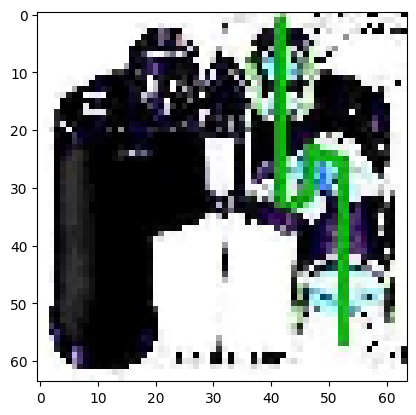

In [ ]:
plt.imshow(x_test[60])
print("Preditcted: ",labels[np.argmax(predicted_value[60])])
print("Actual: ", labels[np.argmax(y_test[60])])

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy is {acc * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.6300 - loss: 2.0045
Accuracy is 63.00%
